# <font color='blue'> Week - 6: Searching in the sea </font>
*Provided by:*
![ENSTABrain](./LogoEB.png)

# <font color='blue'>Agenda</font>

- Use Seaborn Library for Data Visualization
- Perform a GridSearch 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#This command is just to be able to see the plots in a notebook environment
import seaborn as sns #Import seaborn
sns.set() #Set the seaborn aesthetics

In [2]:
df=pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.rename(columns={"Dataset":"label"},inplace=True) #We will rename our label column just so that everything seems clear

In [4]:
# 1: Doesn't have a Disease , 2: Has a Disease
df['label']=df['label'].map({1:0,2:1}) #Using the map function, we can change the contents of our column. Just for convenience

In [5]:
df.head() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


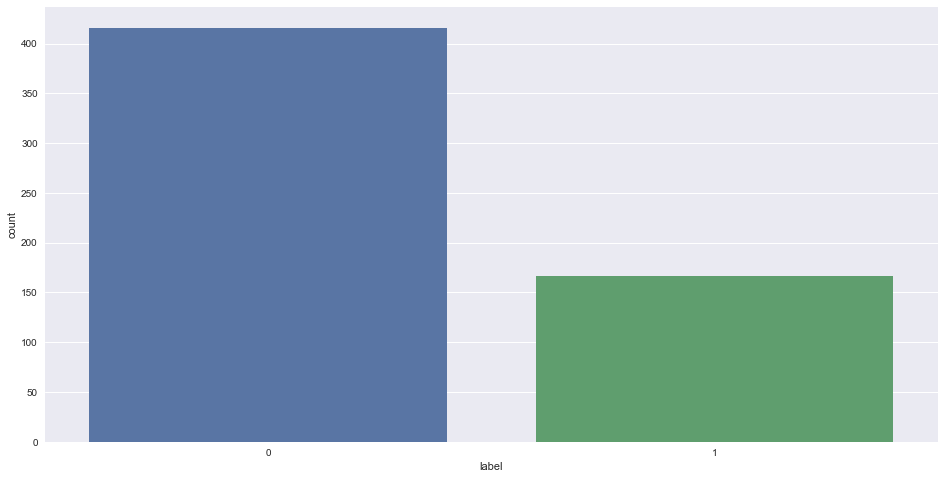

In [6]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['label']) #Using a countplot we can determine how many elements we have in each column


**We can see that we have a lot more 0's than 1's. This is called an unbalanced dataset. It is a fairly common thing to find
in data. There are a lot of techniques that we'll get to use in the next few weeks to fix this problem **

In [7]:
sns.set_style('whitegrid') #Seaborn is widely used because it has so many plot styles to choose from

In [8]:
plt.style.use('ggplot') #Since seaborn is built on top of matplotlib, if we change matplotib's style we affect seaborn

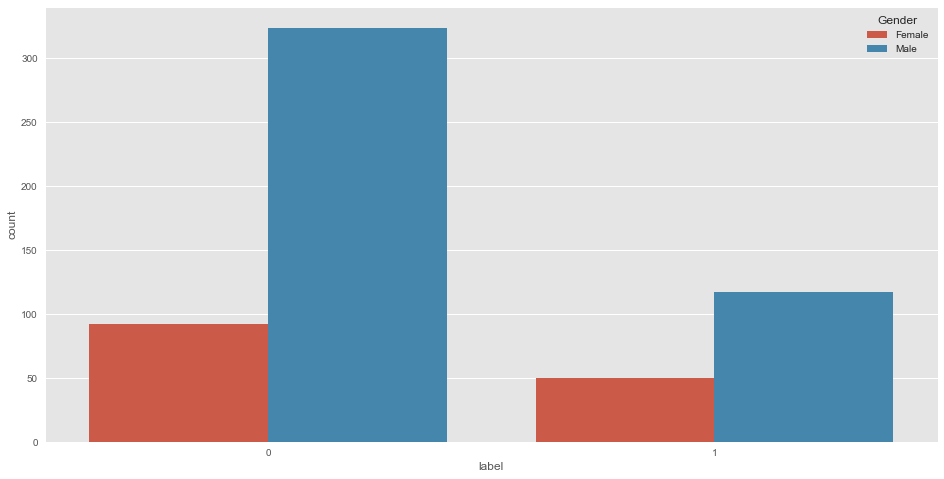

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['label'],hue=df['Gender']) #Using the hue argument we can divide the plots using another feature

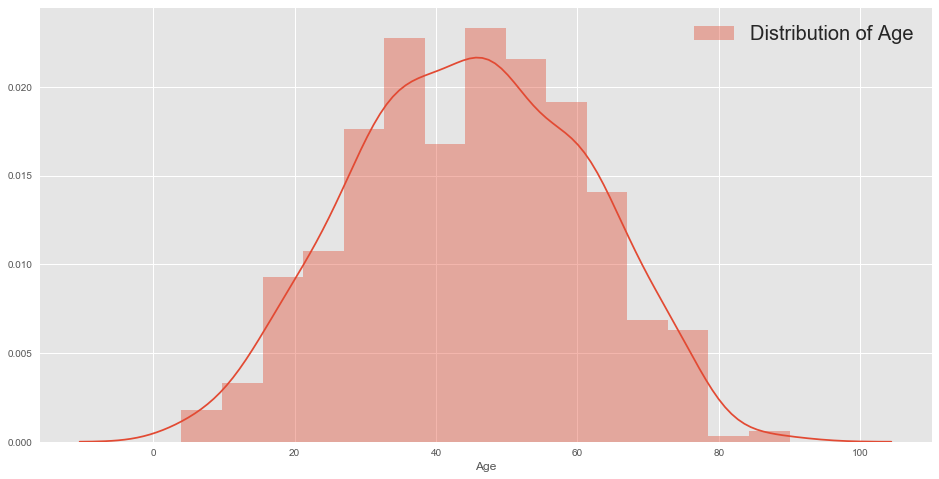

In [10]:
plt.figure(figsize=(16,8))
sns.distplot(df['Age'],label='Distribution of Age') #Plot distribution plots! kde= Kernel Density (We'll comeback for this! keep it in mind) 
plt.legend(fontsize=20) #Adding a legend to our figure

**Look at that beautiful Normal Distribution!!**

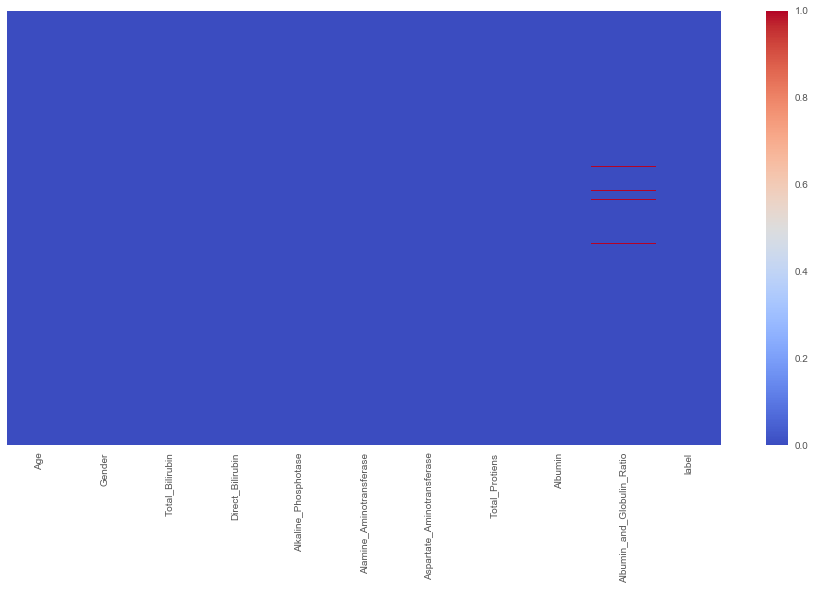

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(),annot=False,yticklabels=False,cmap='coolwarm')
#Using this technique, we can see that we have some NaN values in the "Albumin_and_Globulin_Ratio" column

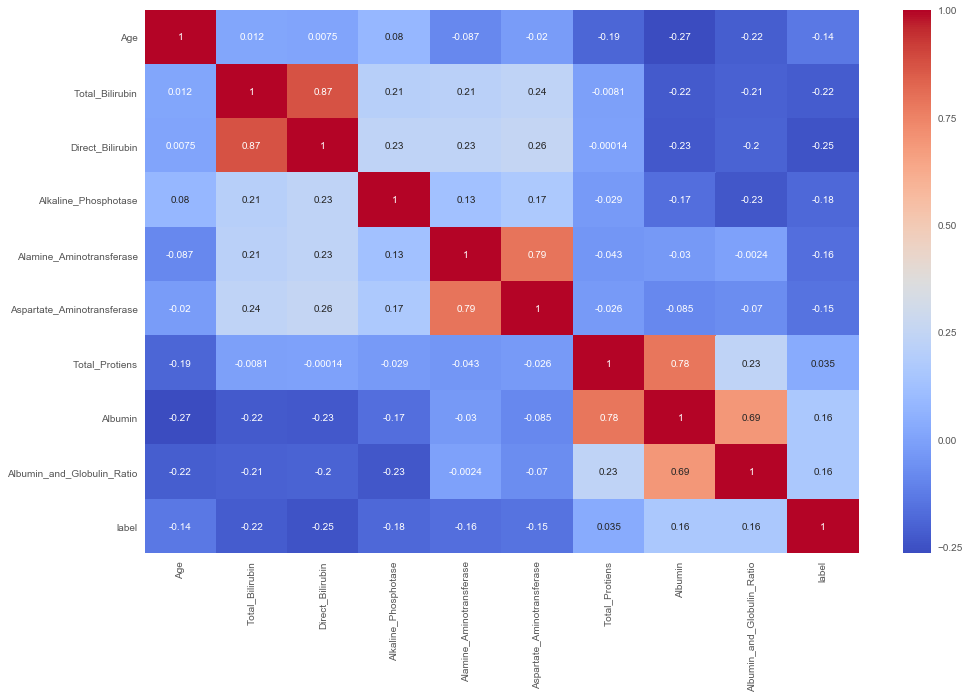

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
#We can see the corrolation map! This way if we can do some feature engineering. We won't be doing it now, because of time issues

In [13]:
df=df.fillna(value=df.mean()) #We fill the NaN Values with the mean of the column

In [14]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'label'],
      dtype='object')

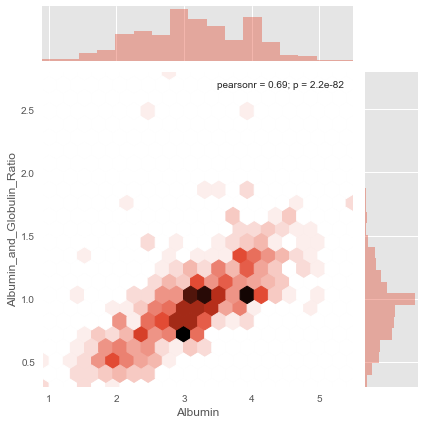

In [15]:
sns.jointplot(x='Albumin',y='Albumin_and_Globulin_Ratio',data=df,kind='hex')
#We can get information about 2 features using a jointplot

In [16]:
#sns.pairplot(df)
#A pairplot will allow us to view the relation between all the features. This can be slow to load depending on the number 
#of features we have

In [17]:
df['Age'].unique() # Using unique() we can see the unique values avalaible in a column

array([65, 62, 58, 72, 46, 26, 29, 17, 55, 57, 64, 74, 61, 25, 38, 33, 40,
       51, 63, 34, 20, 84, 52, 30, 48, 47, 45, 42, 50, 85, 35, 21, 32, 31,
       54, 37, 66, 60, 19, 75, 68, 70, 49, 14, 13, 18, 39, 27, 36, 24, 28,
       53, 15, 56, 44, 41,  7, 22,  8,  6,  4, 43, 23, 12, 69, 16, 78, 11,
       73, 67, 10, 90], dtype=int64)

In [18]:
df['Age']=df['Age'].apply(lambda x: 60 if x in [45,75] else 25  ) #We try to divide the Age categories using apply

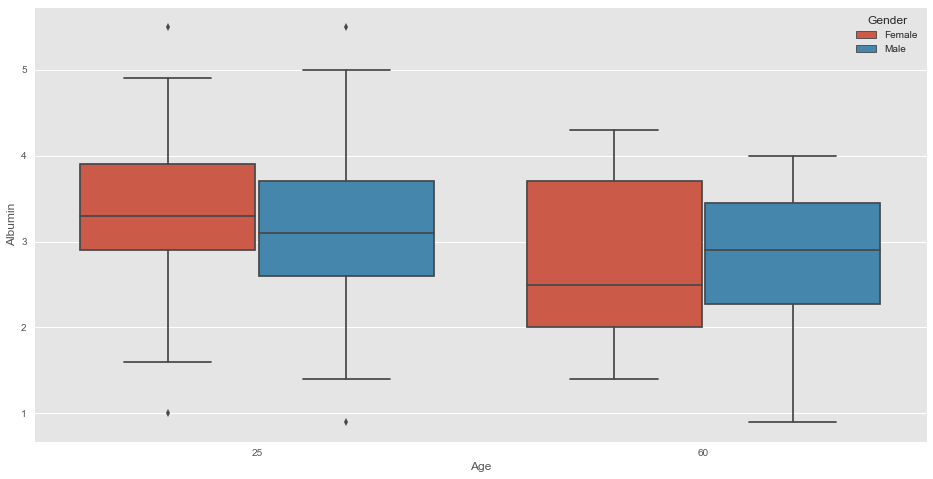

In [19]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Age',y='Albumin',data=df,hue='Gender')
#We can see boxplots using a simple line of code! See References to know more about boxplots

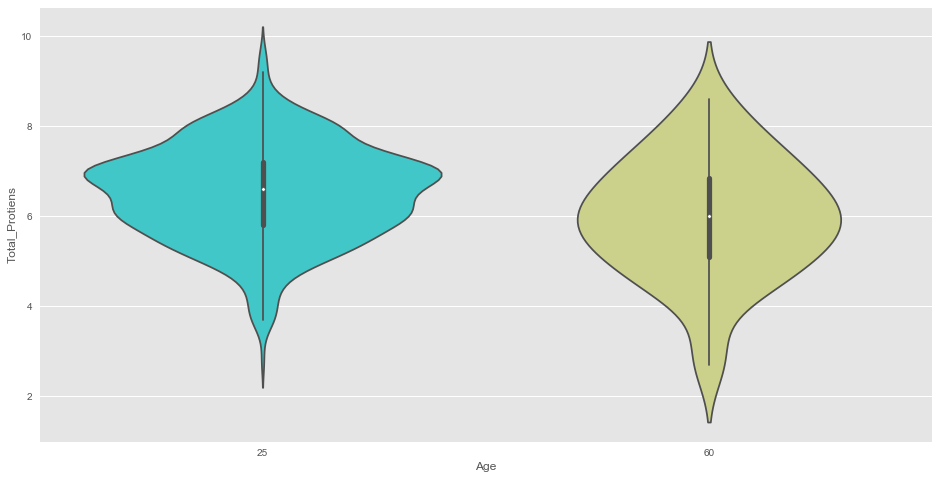

In [20]:
plt.figure(figsize=(16,8))
sns.violinplot(x='Age',y='Total_Protiens',data=df,palette='rainbow')


## <font color='blue'>Preprocessing :</font>

In [21]:
#We need to encode the strings in the Gender column
df['Gender']=pd.get_dummies(df['Gender'])

In [22]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,25,1,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,25,0,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,25,0,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,25,0,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,25,0,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [23]:
features=df.drop(['label'],axis=1) #We get a dataframe of the features
num_features=df.drop(['Gender','label'],axis=1) # dataframe of the numerical features
features.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,25,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,25,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,25,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,25,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,25,0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [24]:
from sklearn.preprocessing import StandardScaler #We do our scaling because we have continuous values
scaler=StandardScaler()
cols=list(num_features.columns) # Make a list of columns names
features_scaled=pd.DataFrame(data=features) #Create a new Dataframe to perform scaling on 
features_scaled[cols]=scaler.fit_transform(features[cols])
features_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,-0.267752,1,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,-0.267752,0,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,-0.267752,0,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,-0.267752,0,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,-0.267752,0,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


## <font color='blue'>Implementing the Model :</font>

In [25]:
X=features_scaled
y=df['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101) #Splitting our Data into test and train data

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=101)
rf.fit(X_train,y_train)
preds=rf.predict(X_test)
#Fitting and making predictions on our data

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
#Let's get a glimpse of the classification report and the confusion matrix

In [28]:
print(confusion_matrix(y_test,preds))
print('\n')
print(classification_report(y_test,preds))

[[110  14]
 [ 36  15]]


             precision    recall  f1-score   support

          0       0.75      0.89      0.81       124
          1       0.52      0.29      0.38        51

avg / total       0.68      0.71      0.69       175



## <font color='blue'>GridSearch :</font>

**Let's try to improve our model by finding the best hyperparameters of our Random Forest**

In [29]:
from sklearn.model_selection import GridSearchCV
#  Create the parameters list we wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
params={'n_estimators':[5,10,100,200,250,300],'max_depth':[5,9,10,20,50,100]}
gd=GridSearchCV(rf,param_grid=params,verbose=10) #Create our grid search and initialize it with our Random Forest model and the params dictionnary

In [30]:
gd.fit(X_train,y_train) #We fit our grid search to our training data


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] max_depth=5, n_estimators=5 .....................................
[CV]  max_depth=5, n_estimators=5, score=0.708029197080292, total=   0.0s
[CV] max_depth=5, n_estimators=5 .....................................
[CV]  max_depth=5, n_estimators=5, score=0.7647058823529411, total=   0.0s
[CV] max_depth=5, n_estimators=5 .....................................
[CV]  max_depth=5, n_estimators=5, score=0.6962962962962963, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV]  max_depth=5, n_estimators=10, score=0.7153284671532847, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ......... max_depth=5, n_estimators=10, score=0.75, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV]  max_depth=5, n_estimators=10, score=0.6962962962962963, total=   0.0s
[CV] max_depth=5, n_estimators=100 ..............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.6861313868613139, total=   0.0s
[CV] max_depth=5, n_estimators=100 ...................................
[CV]  max_depth=5, n_estimators=100, score=0.7279411764705882, total=   0.0s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.725925925925926, total=   0.0s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6788321167883211, total=   0.1s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] ........ max_depth=5, n_estimators=200, score=0.75, total=   0.1s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.7185185185185186, total=   0.1s
[CV] max_depth=5, n_estimators=250 ...................................
[CV]  max_depth=5, n_estimators=250, score=0.6788321167883211, total=   0.2s
[CV] max_depth=5, n_estimators=250 ...................................
[CV]  max_depth=5, n_estimators=250, score=0.7352941176470589, total=   0.3s
[CV] max_depth=5, n_estimators=250 ...................................
[CV]  max_depth=5, n_estimators=250, score=0.725925925925926, total=   0.2s
[CV] max_depth=5, n_estimators=300 ........

[CV]  max_depth=20, n_estimators=200, score=0.7352941176470589, total=   0.2s
[CV] max_depth=20, n_estimators=200 ..................................
[CV]  max_depth=20, n_estimators=200, score=0.7703703703703704, total=   0.2s
[CV] max_depth=20, n_estimators=250 ..................................
[CV]  max_depth=20, n_estimators=250, score=0.7007299270072993, total=   0.2s
[CV] max_depth=20, n_estimators=250 ..................................
[CV]  max_depth=20, n_estimators=250, score=0.7132352941176471, total=   0.2s
[CV] max_depth=20, n_estimators=250 ..................................
[CV]  max_depth=20, n_estimators=250, score=0.7777777777777778, total=   0.2s
[CV] max_depth=20, n_estimators=300 ..................................
[CV]  max_depth=20, n_estimators=300, score=0.6861313868613139, total=   0.3s
[CV] max_depth=20, n_estimators=300 ..................................
[CV]  max_depth=20, n_estimators=300, score=0.7205882352941176, total=   0.3s
[CV] max_depth=20, n_estimat

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   20.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 100, 200, 250, 300], 'max_depth': [5, 9, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [31]:
gd.best_estimator_ #We get the best model that we found using the Grid Search

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [32]:
gd_predict=gd.predict(X_test)

In [33]:
print(confusion_matrix(y_test,gd_predict))
print('\n')
print(classification_report(y_test,gd_predict))

[[104  20]
 [ 35  16]]


             precision    recall  f1-score   support

          0       0.75      0.84      0.79       124
          1       0.44      0.31      0.37        51

avg / total       0.66      0.69      0.67       175



** The model hasn't improved much! It's understandable because we have an unbalanced and small dataset. We will see next week how we can deal with such Datsets and the various methods that can be used to improve our results **  

# <font color='blue' > References: </font>
- ** Stanford University Book:** [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)
- ** Boxplots:** [Wikepedia](https://en.wikipedia.org/wiki/Box_plot)
- ** Violinplots:** [Wikepedia](https://en.wikipedia.org/wiki/Violin_plot)
- ** Confusion Matrix:** [Wikepedia](https://en.wikipedia.org/wiki/Confusion_matrix)

# <font color='blue'> Thank you! Let's meet again on Saturday